<a href="https://colab.research.google.com/github/farooqosama908-dot/MAT-420/blob/main/HW1_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.3f}'.format

We will apply linear regression model to the dataset posted as "Salary".

In [6]:
from google.colab import files
uploaded = files.upload()

Saving 04-LinearReg_Salary.csv to 04-LinearReg_Salary (2).csv


In [7]:
import pandas as pd
df = pd.read_csv("04-LinearReg_Salary.csv")


In [18]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.200,39344.000
1,1,1.400,46206.000
2,2,1.600,37732.000
3,3,2.100,43526.000
4,4,2.300,39892.000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [43]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000,30.000,30.000
mean,14.500,5.413,76004.000
std,8.803,2.838,27414.430
min,0.000,1.200,37732.000
25%,7.250,3.300,56721.750
50%,14.500,4.800,65238.000
75%,21.750,7.800,100545.750
max,29.000,10.600,122392.000


In [26]:
X = df[['YearsExperience']]
y = df['Salary']

In [29]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y, test_size=0.30)

X_train=torch.from_numpy(X_trainN.values.astype(np.float32))
y_train=torch.from_numpy(y_trainN.values.astype(np.float32)).reshape(-1,1)
X_test=torch.from_numpy(X_testN.values.astype(np.float32))
y_test=torch.from_numpy(y_testN.values.astype(np.float32)).reshape(-1,1)

In [30]:
n_samples, n_features = X_train.shape

In [36]:
model=nn.Linear(n_features, 1)

lr=0.01 # Reduced learning rate
n_epoch=1000

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)
train_loss=[]
test_loss=[]


for epoch in range(n_epoch):
    y_pred=model(X_train)
    loss=lossfunc(y_train, y_pred)
    loss.backward()
    train_loss.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

    [w,b]=model.parameters()

    with torch.inference_mode():
        y_test_pred=model(X_test)
        lost_test=lossfunc(y_test, y_test_pred)
        test_loss.append(lost_test)

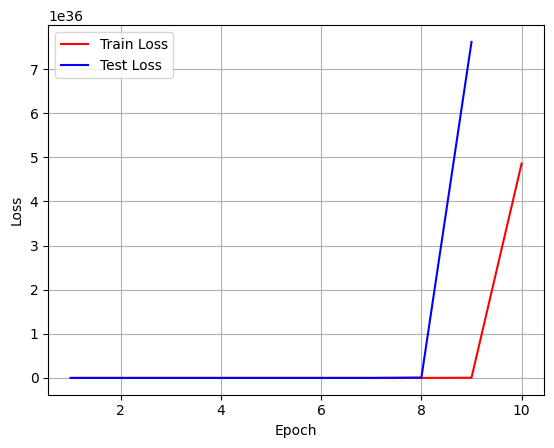

In [35]:
fig=plt.figure()
xv=np.arange(1, n_epoch + 1, 1) # Include all epochs
plt.plot(xv,train_loss, 'r', label="Train Loss") # Plot all train loss
plt.plot(xv, [loss.item() for loss in test_loss], 'b', label="Test Loss") # Plot all test loss and convert tensors to numbers
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
fig.show()

In [37]:
with torch.inference_mode():
    y_test_pred=model(X_test)

# Convert tensors to numpy arrays before calculating R-squared
y_test_np = y_test.numpy()
y_test_pred_np = y_test_pred.numpy()

print('Coefficient of determination: %.2f' % r2_score(y_test_np, y_test_pred_np))

Coefficient of determination: 0.96


In [38]:
regr = LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

print('Coefficient of determination: %.2f' % r2_score(y_test, pred))

Coefficient of determination: 0.97
